In [1]:
from netCDF4 import Dataset
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import rioxarray
import pyproj
import pandas as pd

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
variable = "siconc"
print(variable)
model = "EC-Earth3-CC"
print(model)
experiment = "ssp585"
print(experiment)
freq = "SImon"
print(freq)

siconc
EC-Earth3-CC
ssp585
SImon


## Merging files by time


In [5]:
new = []
historical = []

In [6]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)
        new.append("Data/Raw/{}".format(file))

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)
        historical.append("Data/Raw/{}".format(file))

siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201501-201512.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202501-202512.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_203501-203512.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201601-201612.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201701-201712.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201801-201812.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201901-201912.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202001-202012.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202101-202112.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202201-202212.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202301-202312.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202401-202412.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202601-202612.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202701-202712.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202801-202812.nc
siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202901-202912.nc
siconc_S

In [7]:
new = ' '.join(new)
new

'Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201501-201512.nc Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202501-202512.nc Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_203501-203512.nc Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201601-201612.nc Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201701-201712.nc Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201801-201812.nc Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201901-201912.nc Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202001-202012.nc Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202101-202112.nc Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202201-202212.nc Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202301-202312.nc Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202401-202412.nc Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202601-202612.nc Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_202701-202712.nc Data/

In [8]:
os.putenv("new", ' '.join(new))

In [9]:
!cdo mergetime $new Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201501-210012.nc

cdo    mergetime: Processed 86 variables over 1032 timesteps [29.73s 954MB].


In [44]:
historical_all = historical[-9:-6]
historical_all

['Data/Raw/siconc_SImon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-199912.nc',
 'Data/Raw/siconc_SImon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200001-200412.nc',
 'Data/Raw/siconc_SImon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200501-200912.nc']

In [45]:
historical_all.append(historical[-3])
historical_all

['Data/Raw/siconc_SImon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-199912.nc',
 'Data/Raw/siconc_SImon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200001-200412.nc',
 'Data/Raw/siconc_SImon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200501-200912.nc',
 'Data/Raw/siconc_SImon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_201001-201412.nc']

In [10]:
historical_all = ' '.join(historical)
historical_all

'Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_185601-185612.nc Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_185701-185712.nc Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_185801-185812.nc Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_185901-185912.nc Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_186001-186012.nc Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_186101-186112.nc Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_186201-186212.nc Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_186301-186312.nc Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_186401-186412.nc Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_186601-186612.nc Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_186701-186712.nc Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_186801-186812.nc Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_186901-186912.nc Data/Raw/siconc_SImon_EC

In [11]:
# environment name need to be the same as the variable name
os.putenv("historical_all", ' '.join(historical_all))

In [13]:
!cdo mergetime $historical_all Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_185001-201412.nc

cdo    mergetime: Processed 165 variables over 1980 timesteps [42.56s 1791MB].


## Interpolation


In [14]:
!cdo remapdis,r360x180 Data/Raw/siconc_SImon_EC-Earth3-CC_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

cdo    remapdis: Distance-weighted average weights from curvilinear (362x292) to lonlat (360x180) grid, with source mask (65544)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1032 timesteps [20.19s 231MB].


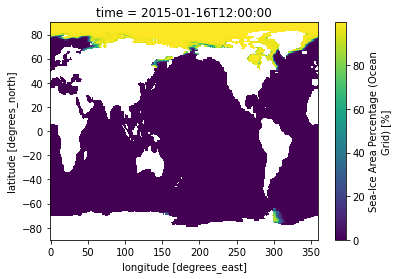

In [15]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [16]:
!cdo remapdis,r360x180 Data/Raw/siconc_SImon_EC-Earth3-CC_historical_r1i1p1f1_gn_185001-201412.nc Data/{variable}_{model}_historical_remapped.nc

cdo    remapdis: Distance-weighted average weights from curvilinear (362x292) to lonlat (360x180) grid, with source mask (65544)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1980 timesteps [39.50s 243MB].


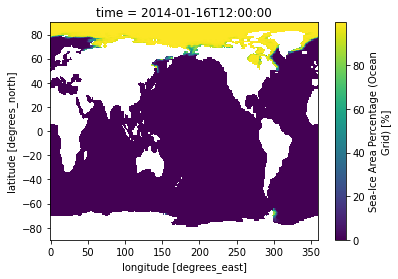

In [17]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## Sea ice selection

#### Selecting mask region

In [18]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(lat=slice(-90,0))
nc

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lon: 360, lat: 90)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -3.5 -2.5 -1.5 -0.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    siconc     (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:37:50 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/243282eb-ae77-4c44-8ff8-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

In [19]:
# Selecting the last 20 years of historical
nc = nc.drop_vars("time_bnds")
history = nc.sel(time=slice('1995-01', '2014-12'))
history

<xarray.Dataset>
Dimensions:  (time: 240, lon: 360, lat: 90)
Coordinates:
  * time     (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... -3.5 -2.5 -1.5 -0.5
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                                Climate Data Interface version 1.9.8 ...
    history:                            Thu Aug 11 19:37:50 2022: cdo remapdi...
    source:                             EC-Earth3-CC (2019): \naerosol: none\...
    institution:                        AEMET, Spain; BSC, Spain; CNR-ISAC, I...
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/243282eb-ae77-4c44-8ff8-...
    latest_applied_cmor_fixer_version:  v3.0
    CDO:                                Climate Data Operators version 1.9.8 ...

In [20]:
# Finding yearly max ice cover 
yearly_max = history.groupby("time.year").max("time")
yearly_max

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 90, year: 20)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... -3.5 -2.5 -1.5 -0.5
  * year     (year) int64 1995 1996 1997 1998 1999 ... 2010 2011 2012 2013 2014
Data variables:
    siconc   (year, lat, lon) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0

In [21]:
# Calculating mean over 20 years
mean = yearly_max.mean(dim = "year")
mean

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 90)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... -3.5 -2.5 -1.5 -0.5
Data variables:
    siconc   (lat, lon) float32 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0

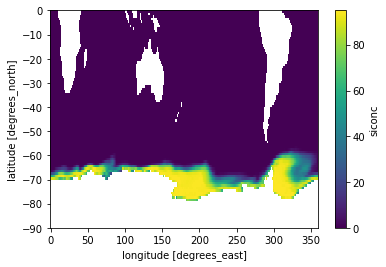

In [22]:
mean[variable].plot()

In [23]:
mean.to_netcdf(path = "Data/{}_{}_ice_extent.nc".format(variable, model), mode = "w", format = "NETCDF4")

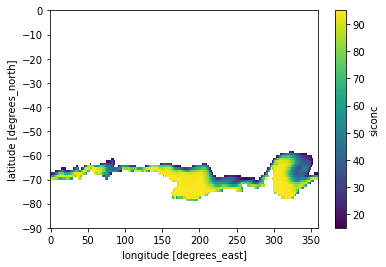

In [24]:
# Select cells with >15% ice cover
ice = mean.where(mean >= 15)
ice[variable].plot()

In [25]:
ice = ice.assign(ice = lambda x: getattr(x, variable) - getattr(x, variable) + 1)

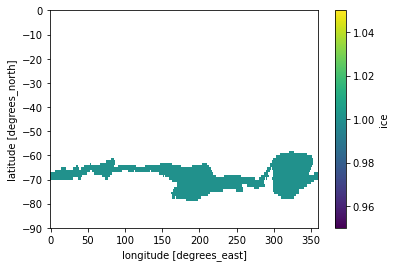

In [26]:
ice['ice'].plot()

In [27]:
ice = ice.drop_vars("siconc")
ice.to_netcdf(path = "Data/Shape/{}_{}_ice_region.nc".format(variable, model), mode = "w", format = "NETCDF4")

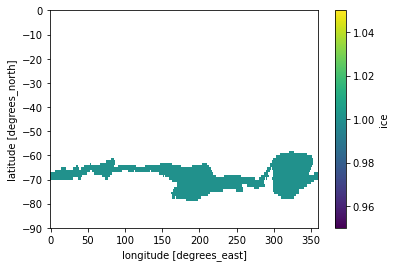

In [28]:
nc = xarray.open_dataset("Data/Shape/{}_{}_ice_region.nc".format(variable, model))
nc['ice'].plot()

### Making mask

In [5]:
shape = gpd.read_file("Shapes/{}_ice_margin.shp".format(model), crs = "EPSG:4326")
shape

,DN,geometry
0,1,"POLYGON ((320.500 -58.000, 327.500 -58.000, 32..."


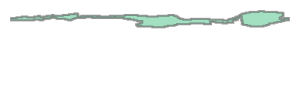

In [6]:
coord1 = shape['geometry'][0].exterior.coords
line1 = shp.LinearRing(coord1)
poly1 = shp.Polygon(line1)
poly1

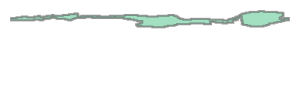

In [7]:
multi_poly = shp.MultiPolygon([poly1])
multi_poly

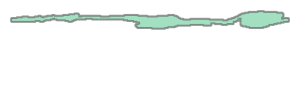

In [8]:
# Expand the region by 1 cells to include open sea
expand = shp.Polygon(multi_poly.buffer(1.0))
expand

In [9]:
ice_new = gpd.GeoSeries(expand)
ice_new

0    POLYGON ((87.500 -64.000, 89.500 -64.000, 89.5...
dtype: geometry

In [10]:
ice_new.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_extended_ice_margin.shp".format(model))

In [11]:
ice_new.crs = {'init' :'epsg:4326'}

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


<AxesSubplot:>

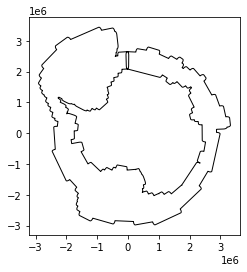

In [12]:
df_ae = ice_new.to_crs("epsg:3031")
df_ae.plot(facecolor="none", edgecolor="black")

In [13]:
df_ae.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_ice_margin_remapped.shp".format(model))